In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/full-filled-brain-stroke-dataset/full_data.csv
/kaggle/input/full-filled-brain-stroke-dataset/full_filled_stroke_data (1).csv


In [2]:
# Input data files are available in the "../input/" directory.
# First let us load the datasets into different Dataframes
def load_data(datapath):
    data = pd.read_csv(datapath)
   # Dimensions
    print('Shape:', data.shape)
    # Set of features we have are: date, store, and item
    display(data.sample(10))
    return data
df=load_data('../input/full-filled-brain-stroke-dataset/full_data.csv')

Shape: (4981, 11)


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
865,Male,15.0,0,0,No,Private,Urban,57.94,41.7,Unknown,0
73,Female,79.0,0,1,Yes,Private,Urban,226.98,29.8,never smoked,1
2250,Female,77.0,0,0,Yes,Govt_job,Rural,167.59,34.3,formerly smoked,0
2890,Male,42.0,0,0,No,Govt_job,Urban,115.21,28.7,Unknown,0
679,Female,58.0,1,0,Yes,Private,Urban,85.83,44.0,formerly smoked,0
2838,Female,79.0,0,0,No,Self-employed,Urban,77.59,33.0,never smoked,0
3327,Female,65.0,0,0,No,Govt_job,Urban,60.70,31.3,never smoked,0
552,Female,52.0,0,0,No,Private,Rural,88.04,42.1,never smoked,0
1430,Male,42.0,0,0,Yes,Private,Urban,83.14,23.7,never smoked,0
1413,Female,77.0,1,0,Yes,Self-employed,Rural,238.53,30.6,never smoked,0


# **Cumulative statistics description**

In [3]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


# **Checking null values**

In [4]:
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

**We don't have any null datatypes,Lets move to the next step**

# **Data proportions**

In [5]:
df['gender'].unique()

array(['Male', 'Female'], dtype=object)

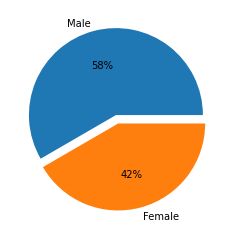

In [6]:
# importing libraries
import matplotlib.pyplot as plt
import seaborn

# declaring data
data = df['gender'].value_counts()
keys = ['Male', 'Female']
explode = [0, 0.1]
# plotting data on chart
plt.pie(data, labels=keys,explode=explode,autopct='%.0f%%')

# displaying chart
plt.show()


**The data has more male records than female records**

In [7]:
stroke=[1]
gender=['Male','Female']
peoplesaffected_by_stroke=df.loc[df['stroke'].isin(stroke)]
males=len(peoplesaffected_by_stroke[peoplesaffected_by_stroke['gender']==gender[0]])
females=len(peoplesaffected_by_stroke[peoplesaffected_by_stroke['gender']==gender[1]])
print('Overall peoples affected by strokes:',len(peoplesaffected_by_stroke))
print('proportion of males:',males)
print('proportion of females:',females)

Overall peoples affected by strokes: 248
proportion of males: 108
proportion of females: 140


**With this insight we're judging here,Females are more affected by brain strokes**

# **Smoking status**

In [8]:
df['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [9]:
smoking_status=['formerly smoked','never smoked','smokes','Unknown']
never_smoked=len(peoplesaffected_by_stroke[peoplesaffected_by_stroke['smoking_status']==smoking_status[1]])
formerly_smoked=len(peoplesaffected_by_stroke[peoplesaffected_by_stroke['smoking_status']==smoking_status[0]])
smoked=len(peoplesaffected_by_stroke[peoplesaffected_by_stroke['smoking_status']==smoking_status[2]])
unknown=len(peoplesaffected_by_stroke[peoplesaffected_by_stroke['smoking_status']==smoking_status[3]])
print('never_smoked:',never_smoked)
print('formerly_smoked:',formerly_smoked)
print('smoked:',smoked)
print('Unknown:',unknown)

never_smoked: 89
formerly_smoked: 70
smoked: 42
Unknown: 47


In [10]:
df['ever_married'].value_counts()

Yes    3280
No     1701
Name: ever_married, dtype: int64

In [11]:
marriage_status=['Yes','No']
married=len(peoplesaffected_by_stroke[peoplesaffected_by_stroke['ever_married']==marriage_status[0]])
not_married=len(peoplesaffected_by_stroke[peoplesaffected_by_stroke['ever_married']==marriage_status[1]])
print("Married:",married)
print('Not married:',not_married)

Married: 219
Not married: 29


**Lot of married guys are affected by brain stroke!!** **Be aware married guys😁**

In [12]:

import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning:

The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.



In [13]:
stroke = df.loc[df['stroke']== 1].reset_index()

stroke["male_age"]=stroke[stroke["gender"]=="Male"]["age"]
stroke["female_age"]=stroke[stroke["gender"]=="Female"]["age"]
stroke[["male_age","female_age"]].iplot(kind="histogram", bins=20, theme="white", title="Stroke Ages",
         xTitle='Ages', yTitle='Count')

**This part of graphcode forked from**
*https://www.kaggle.com/code/reihanenamdari/brain-stroke-prediction-decisiontree/notebook*

# Data preprocessing

In [14]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


In [15]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'species'.
df['ever_married']= label_encoder.fit_transform(df['ever_married'])
df['work_type']= label_encoder.fit_transform(df['work_type'])
df['Residence_type']=label_encoder.fit_transform(df['Residence_type'])
df['smoking_status']=label_encoder.fit_transform(df['smoking_status'])
df['gender']=label_encoder.fit_transform(df['gender'])

df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,1,228.69,36.6,1,1
1,1,80.0,0,1,1,1,0,105.92,32.5,2,1
2,0,49.0,0,0,1,1,1,171.23,34.4,3,1
3,0,79.0,1,0,1,2,0,174.12,24.0,2,1
4,1,81.0,0,0,1,1,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,1,41.0,0,0,0,1,0,70.15,29.8,1,0
4977,1,40.0,0,0,1,1,1,191.15,31.1,3,0
4978,0,45.0,1,0,1,0,0,95.02,31.8,3,0
4979,1,40.0,0,0,1,1,0,83.94,30.0,3,0


# Correlation Map

                     gender       age  hypertension  heart_disease  \
gender             1.000000 -0.026538      0.021485       0.086476   
age               -0.026538  1.000000      0.278120       0.264852   
hypertension       0.021485  0.278120      1.000000       0.111974   
heart_disease      0.086476  0.264852      0.111974       1.000000   
ever_married      -0.028971  0.677137      0.164534       0.114765   
work_type          0.065784 -0.415935     -0.061618      -0.036943   
Residence_type    -0.004301  0.017155     -0.004755       0.002125   
avg_glucose_level  0.055796  0.236763      0.170028       0.166847   
bmi               -0.012093  0.373703      0.158762       0.060926   
smoking_status    -0.062666  0.265623      0.110045       0.048093   
stroke             0.008870  0.246478      0.131965       0.134610   

                   ever_married  work_type  Residence_type  avg_glucose_level  \
gender                -0.028971   0.065784       -0.004301           0.055796 

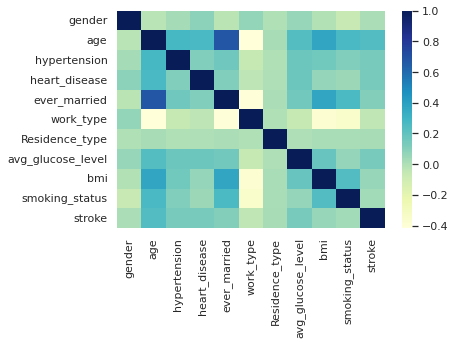

In [16]:
import matplotlib.pyplot as mp
import seaborn as sns
data = df

# prints data that will be plotted
# columns shown here are selected by corr() since
# they are ideal for the plot
print(data.corr())
sns.set_theme(style="whitegrid")
# plotting correlation heatmap
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=False)

# displaying heatmap
mp.show()

**ML Modeling**

In [17]:
X = df["stroke"]
y = df.drop(['stroke'], axis=1)

In [18]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [19]:
from sklearn.model_selection import train_test_split,GridSearchCV

x_train, x_test, y_train, y_test = train_test_split(y, X, test_size=0.30, shuffle=True, random_state=0)

In [20]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)

In [21]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1430
           1       0.00      0.00      0.00        65

    accuracy                           0.96      1495
   macro avg       0.48      0.50      0.49      1495
weighted avg       0.91      0.96      0.94      1495



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [22]:
print(clf.score(x_train,y_train))
print(clf.score(x_test,y_test))

0.9475043029259896
0.9565217391304348


In [23]:
clf.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(max_depth=2, random_state=0)>

In [24]:
params={
    "n_estimators":[90,100,115,130],
    "criterion":['gini','entropy'],
    "max_depth":range(2,20,1),
    "min_samples_leaf":range(1,10,1),
    "min_samples_split":range(2,10,1),
    "max_features":['auto','log2']
}

In [25]:
grid_svc = GridSearchCV(estimator=clf, param_grid=params,cv=2,n_jobs=-1,verbose=3)

In [26]:
#grid_svc.fit(x_train, y_train)
#grid_svc.best_params_

In [27]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [28]:
classifiers=[['Naive Bayes :', GaussianNB()],['LogisticRegression :', LogisticRegression(max_iter = 1000)], ['DecisionTree :',DecisionTreeClassifier()]]

In [29]:
for name,classifier in classifiers:
    classifier = classifier
    classifier.fit(x_train, y_train.ravel())
    predictions = classifier.predict(x_test)
    print(name, accuracy_score(y_test, predictions))

Naive Bayes : 0.8635451505016722
LogisticRegression : 0.9565217391304348
DecisionTree : 0.9050167224080268


In [30]:
from sklearn.ensemble import VotingClassifier
clf1 = GaussianNB()
clf2 = DecisionTreeClassifier()
clf3 = LogisticRegression()


    
vot_hard = VotingClassifier(estimators= classifiers, voting='hard')
vot_hard.fit(x_train, y_train)

VotingClassifier(estimators=[['Naive Bayes :', GaussianNB()],
                             ['LogisticRegression :',
                              LogisticRegression(max_iter=1000)],
                             ['DecisionTree :', DecisionTreeClassifier()]])

In [31]:
vot_soft = VotingClassifier(estimators = classifiers, voting ='soft')
vot_soft.fit(x_train, y_train)

VotingClassifier(estimators=[['Naive Bayes :', GaussianNB()],
                             ['LogisticRegression :',
                              LogisticRegression(max_iter=1000)],
                             ['DecisionTree :', DecisionTreeClassifier()]],
                 voting='soft')

In [32]:
print("Training data accuracy:", vot_hard.score(x_train, y_train))
print("Testing data accuracy", vot_hard.score(x_test, y_test))

print("Training data accuracy:", vot_soft.score(x_train, y_train))
print("Testing data accuracy", vot_soft.score(x_test, y_test))

Training data accuracy: 0.9695926563396443
Testing data accuracy 0.9377926421404682
Training data accuracy: 0.9718875502008032
Testing data accuracy 0.937123745819398


**Training accuracy and Testing accuracy are pretty close to each other here,So there is no chance of overfitting here,Compared to standlone machine learning models,The ensemble approaches are slightly low,All the models giving some good accuracy here,Especically random forest and logistic regression**